In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('crypto.csv')

# Replace missing values with mean
df.fillna(df.mean(), inplace=True)

# Change column names to lower case
df.columns = df.columns.str.lower()

# Save the cleaned and normalized dataset as a new CSV file
df.to_csv('crypto-cleaned.csv', index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14796\1360928751.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


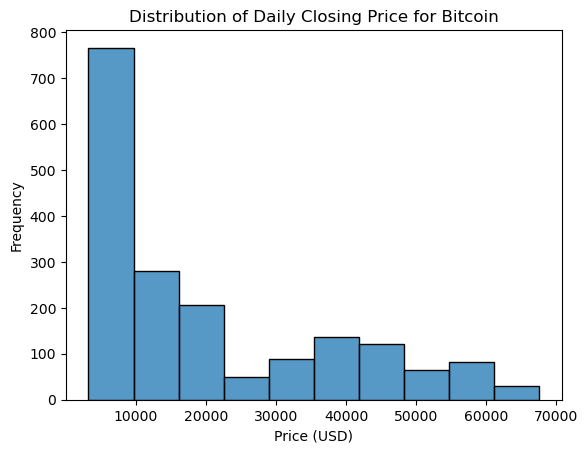

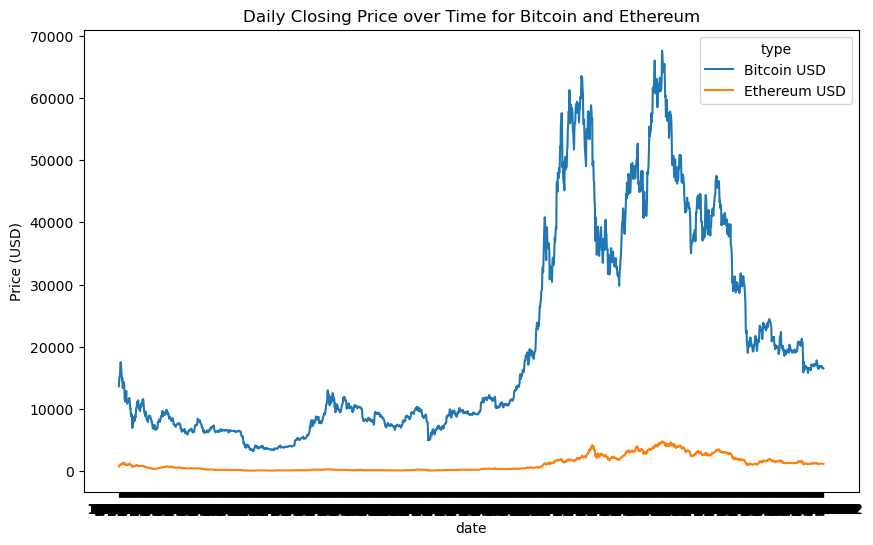

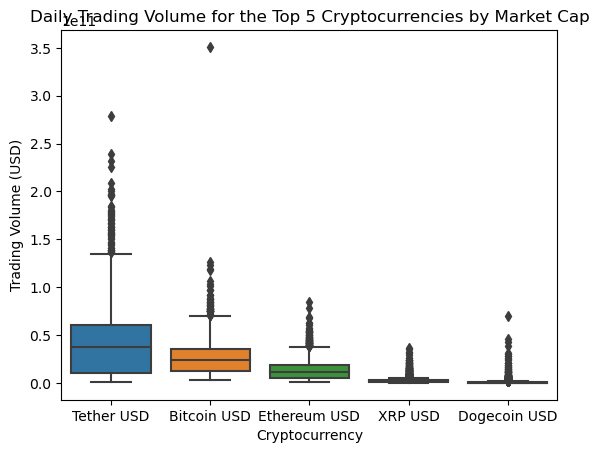

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and normalized dataset
df = pd.read_csv('crypto-cleaned.csv')

# Distribution of daily closing price for Bitcoin
sns.histplot(data=df[df['type'] == 'Bitcoin USD'], x='close', bins=10)
plt.title('Distribution of Daily Closing Price for Bitcoin')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Line plot of daily closing price over time for Bitcoin and Ethereum
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df[(df['type'] == 'Bitcoin USD') | (df['type'] == 'Ethereum USD')], x='date', y='close', hue='type', ax=ax)
ax.set_title('Daily Closing Price over Time for Bitcoin and Ethereum')
ax.set_ylabel('Price (USD)')
plt.show()

# Box plot of daily trading volume for the top 5 cryptocurrencies by market cap
top_5 = df.groupby('type')['volume'].max().sort_values(ascending=False).head(5).index
sns.boxplot(data=df[df['type'].isin(top_5)], x='type', y='volume')
plt.title('Daily Trading Volume for the Top 5 Cryptocurrencies by Market Cap')
plt.xlabel('Cryptocurrency')
plt.ylabel('Trading Volume (USD)')
plt.show()

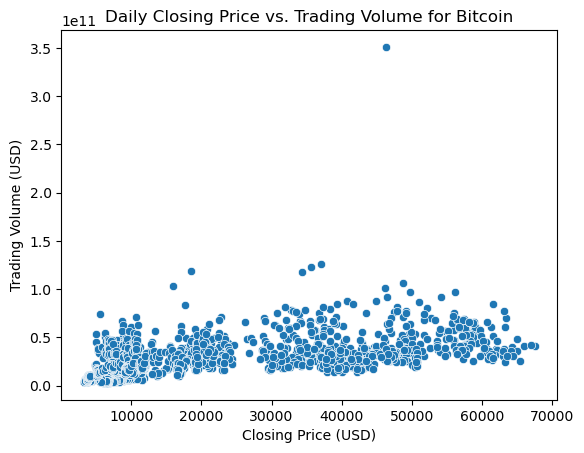

In [35]:
sns.scatterplot(data=df[df['type'] == 'Bitcoin USD'], x='close', y='volume')
plt.title('Daily Closing Price vs. Trading Volume for Bitcoin')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Trading Volume (USD)')
plt.show()

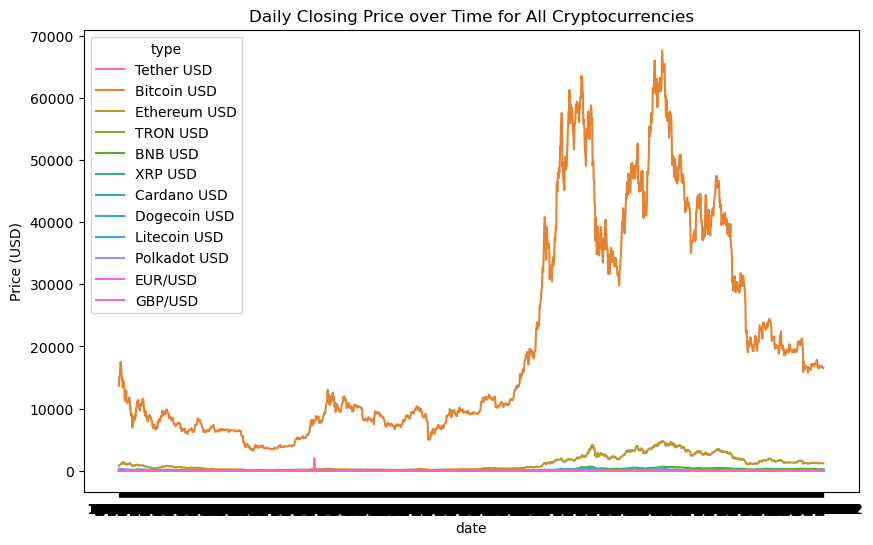

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='close', hue='type', ax=ax)
ax.set_title('Daily Closing Price over Time for All Cryptocurrencies')
ax.set_ylabel('Price (USD)')
plt.show()

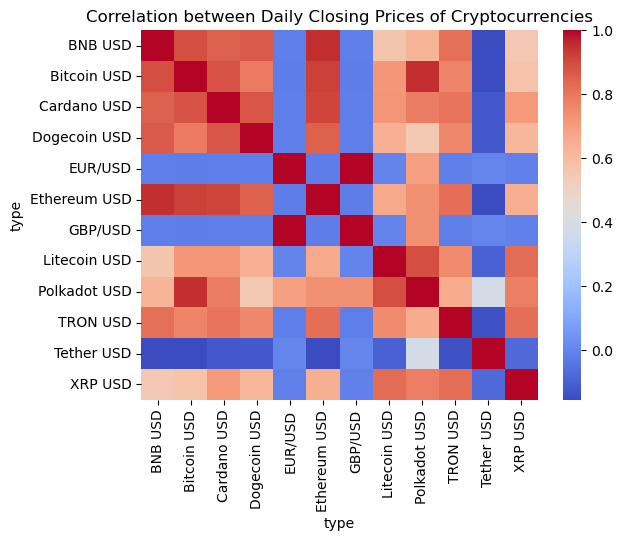

In [37]:
# Pivot table to get daily closing prices as columns for each cryptocurrency
pivot_table = df.pivot(index='date', columns='type', values='close')

# Compute correlation matrix between daily closing prices
corr_matrix = pivot_table.corr()

# Heatmap of correlation matrix
sns.heatmap(data=corr_matrix, cmap='coolwarm')
plt.title('Correlation between Daily Closing Prices of Cryptocurrencies')
plt.show()

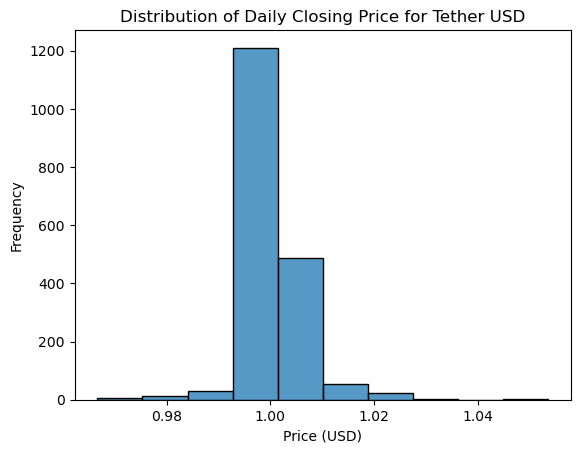

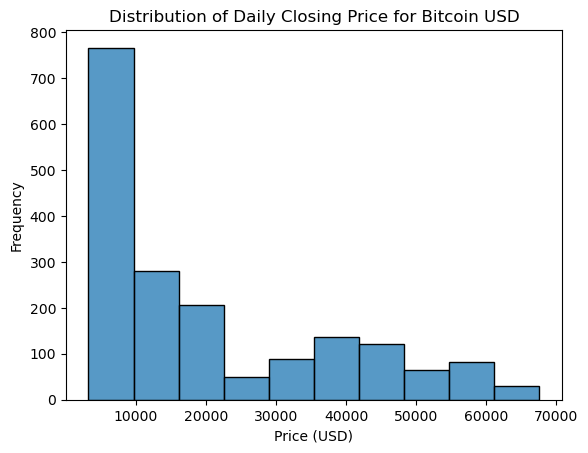

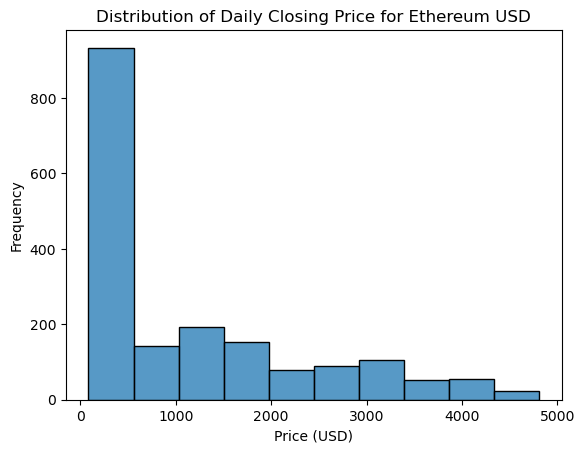

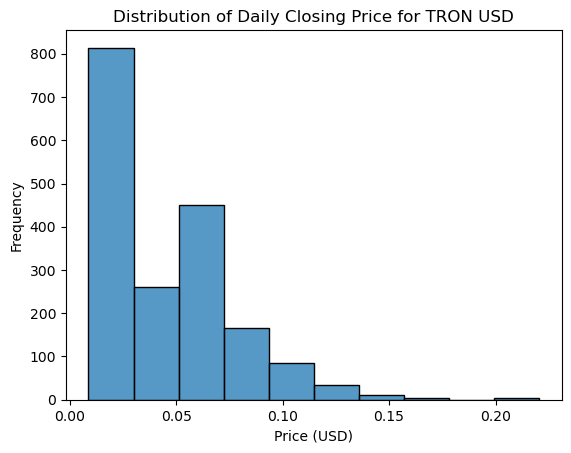

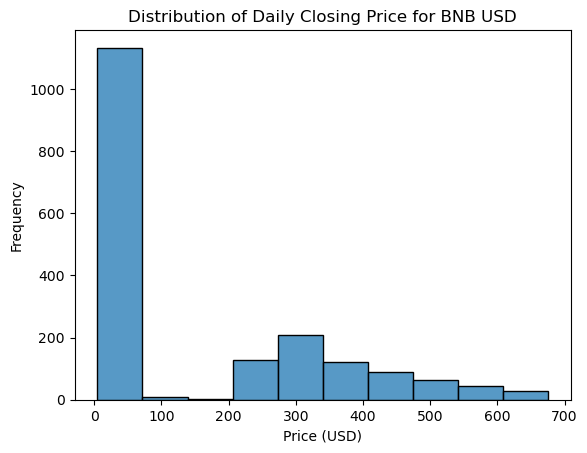

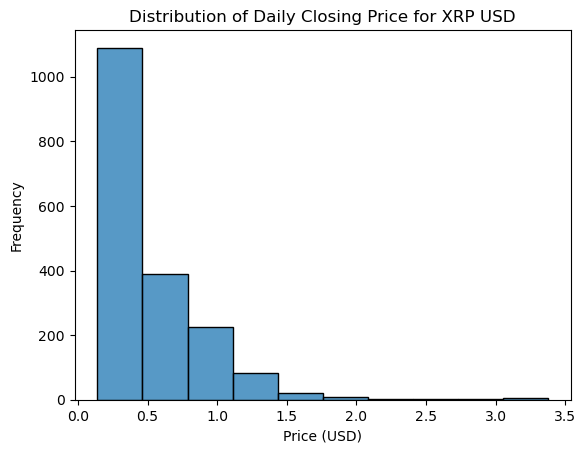

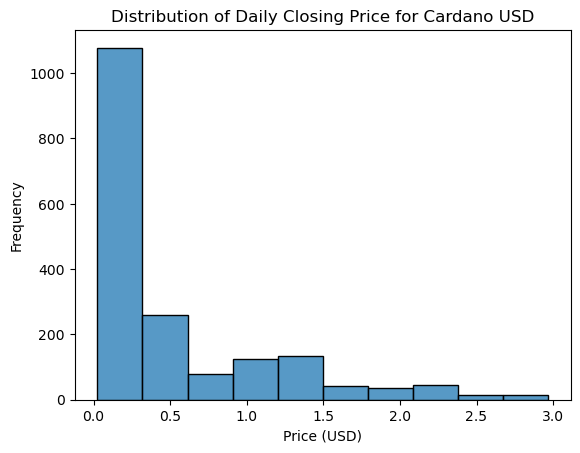

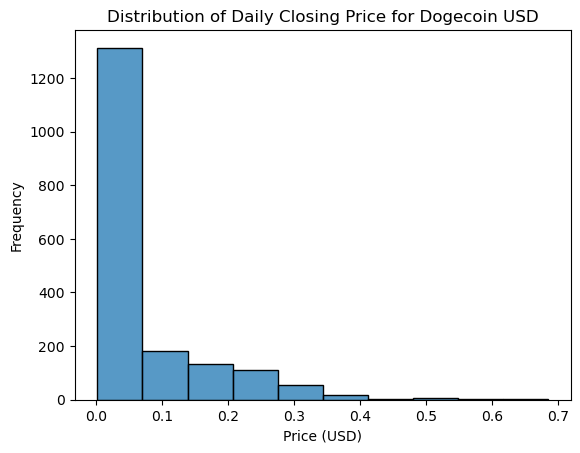

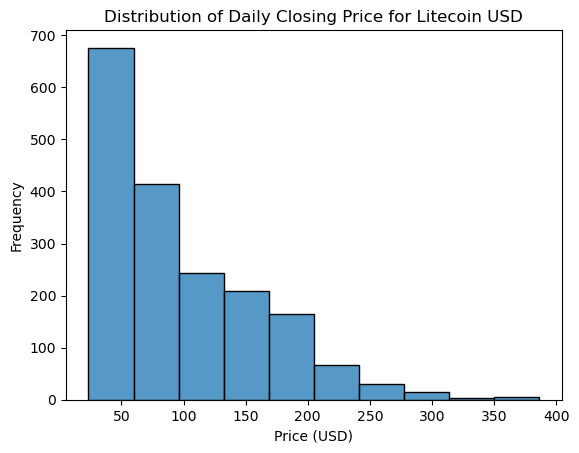

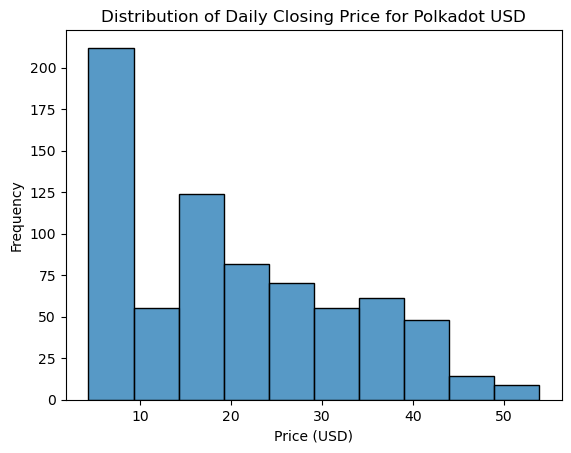

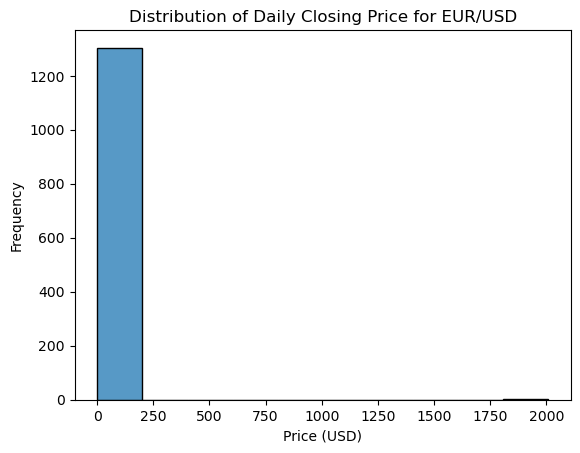

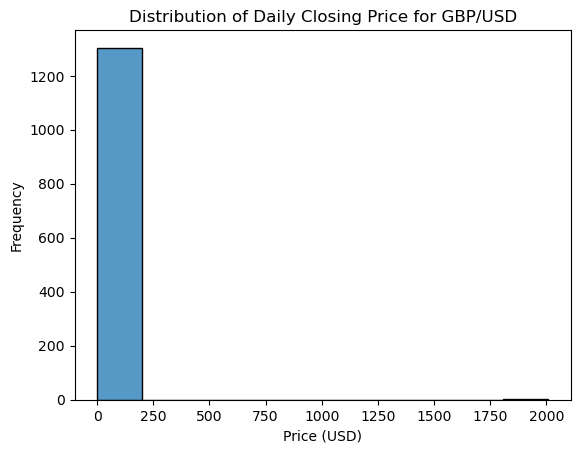

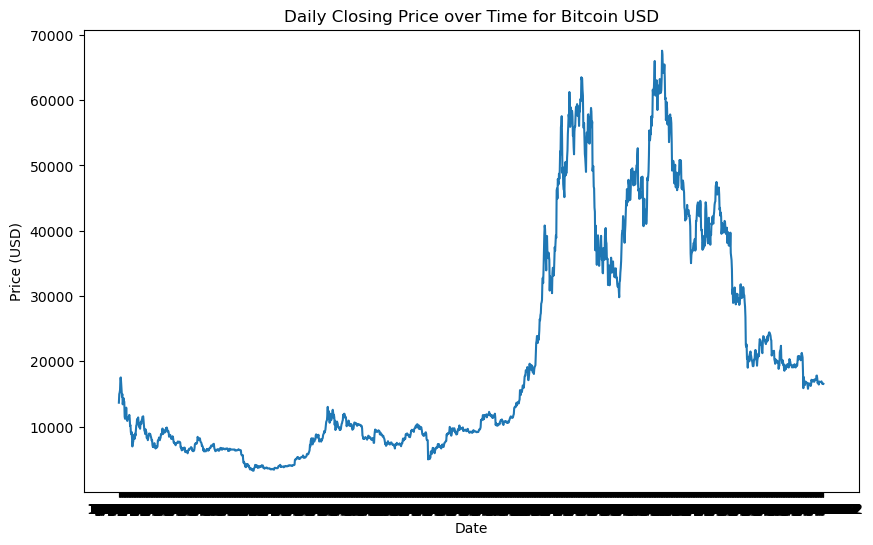

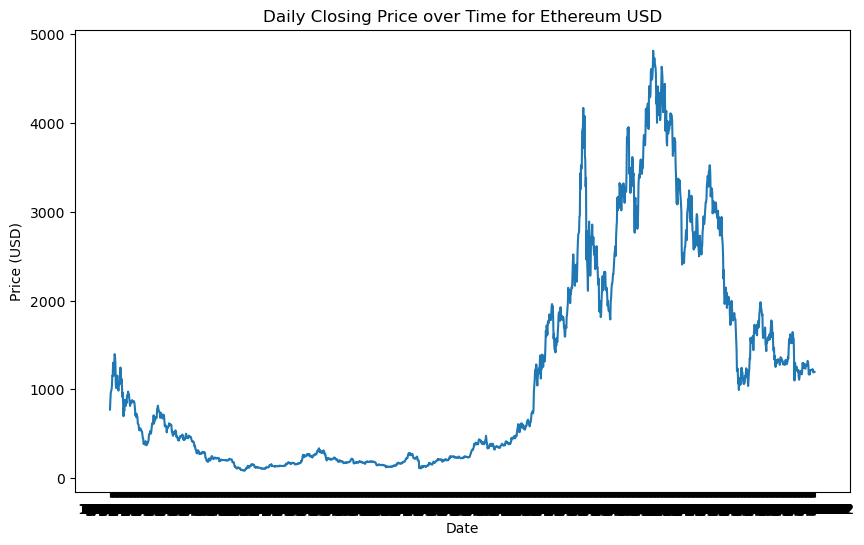

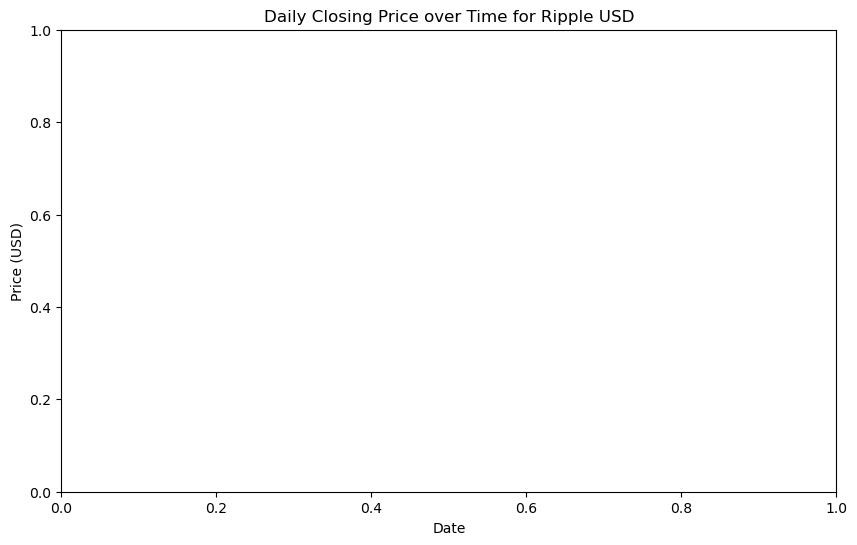

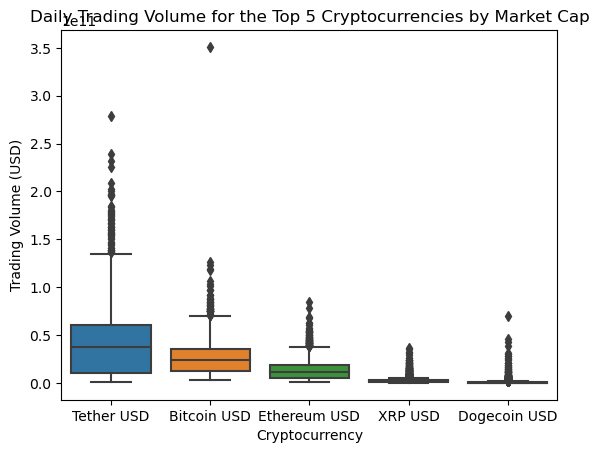

In [38]:
for coin in df['type'].unique():
    plt.figure()
    sns.histplot(data=df[df['type'] == coin], x='close', bins=10)
    plt.title(f'Distribution of Daily Closing Price for {coin}')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()

# Generate line plots of daily closing prices over time for Bitcoin, Ethereum, and Ripple
top_coins = ['Bitcoin USD', 'Ethereum USD', 'Ripple USD']
for coin in top_coins:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df[df['type'] == coin], x='date', y='close')
    plt.title(f'Daily Closing Price over Time for {coin}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.show()

# Generate box plots of daily trading volume for the top 5 cryptocurrencies by market cap
top_5 = df.groupby('type')['volume'].max().sort_values(ascending=False).head(5).index
sns.boxplot(data=df[df['type'].isin(top_5)], x='type', y='volume')
plt.title('Daily Trading Volume for the Top 5 Cryptocurrencies by Market Cap')
plt.xlabel('Cryptocurrency')
plt.ylabel('Trading Volume (USD)')
plt.show()

In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the cleaned and normalized dataset
df = pd.read_csv('crypto-cleaned.csv')

# Select the target variable and features
target = 'close'
features = ['open', 'high', 'low', 'volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 23772.59


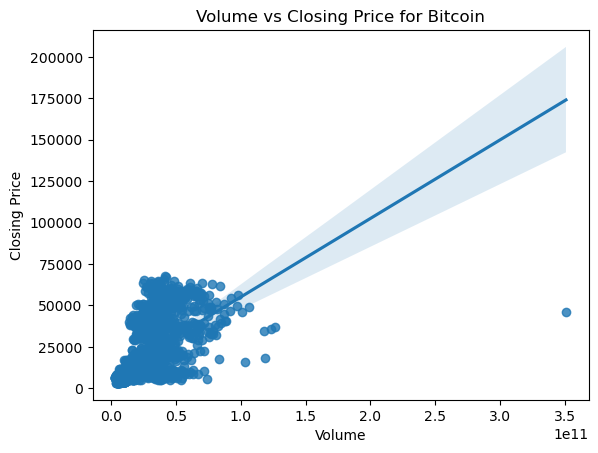

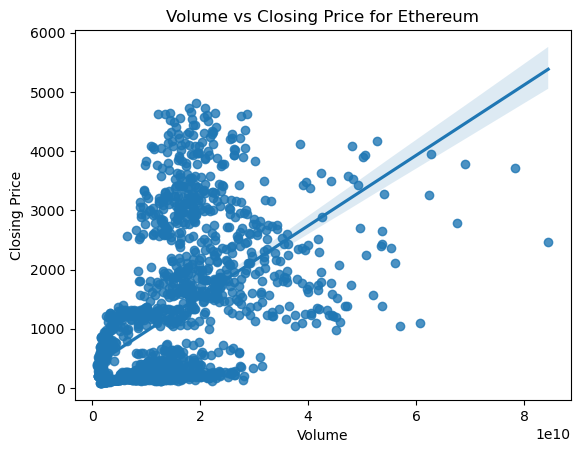

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned and normalized dataset
df = pd.read_csv('crypto-cleaned.csv')

# Filter the data for Bitcoin and Ethereum
btc_eth_df = df[(df['type'] == 'Bitcoin USD') | (df['type'] == 'Ethereum USD')]

# Plot the scatter plot and linear regression line for Bitcoin
sns.regplot(data=btc_eth_df[btc_eth_df['type'] == 'Bitcoin USD'], x='volume', y='close')
plt.title('Volume vs Closing Price for Bitcoin')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

# Plot the scatter plot and linear regression line for Ethereum
sns.regplot(data=btc_eth_df[btc_eth_df['type'] == 'Ethereum USD'], x='volume', y='close')
plt.title('Volume vs Closing Price for Ethereum')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

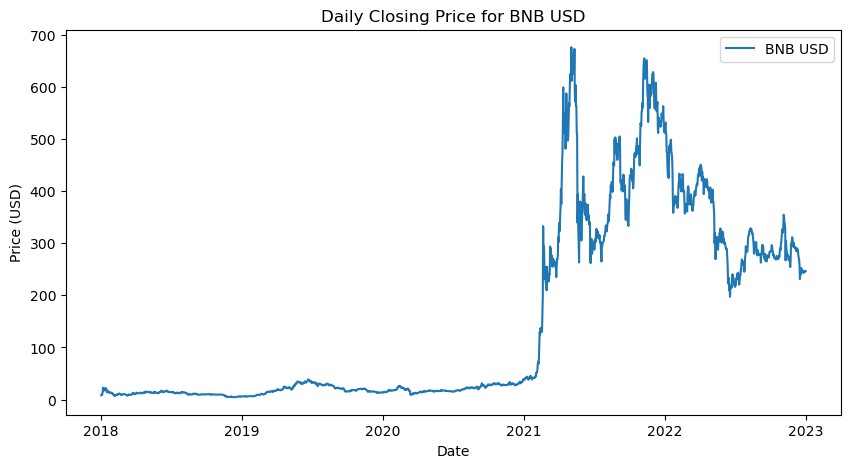

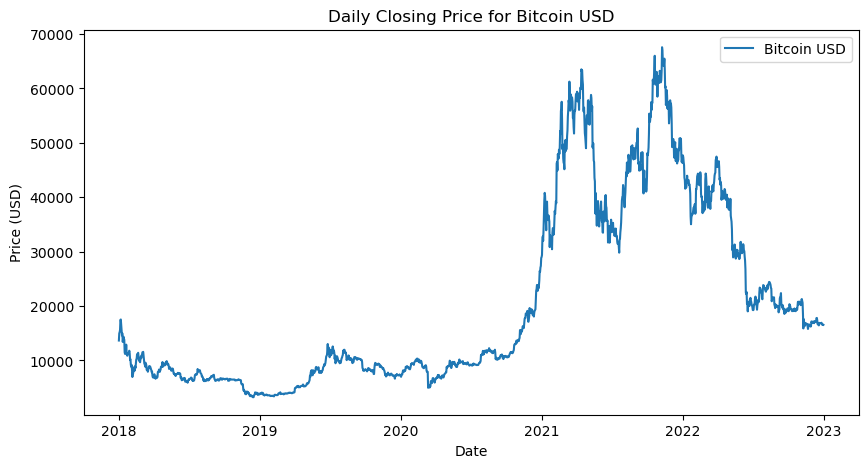

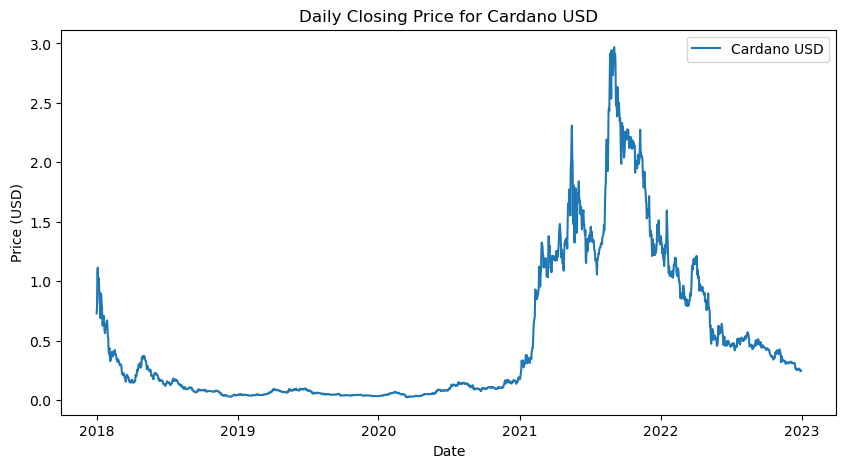

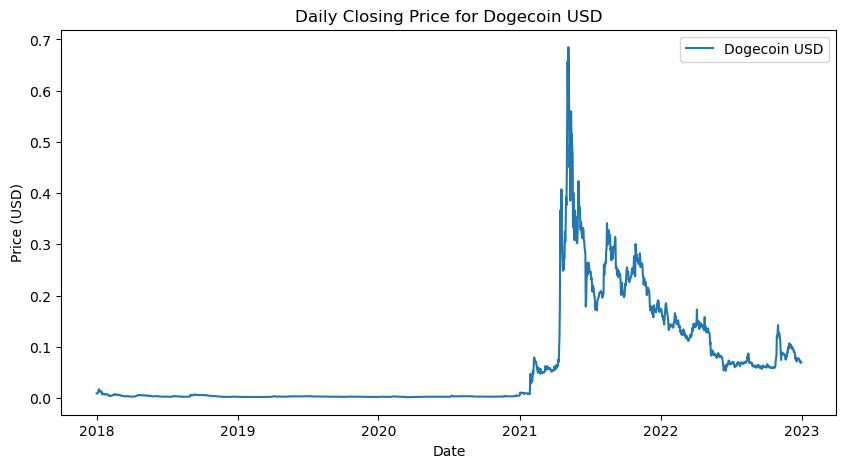

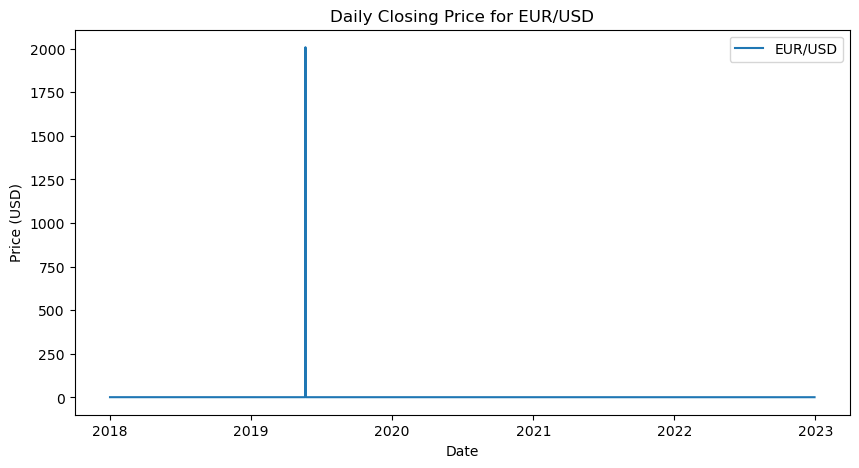

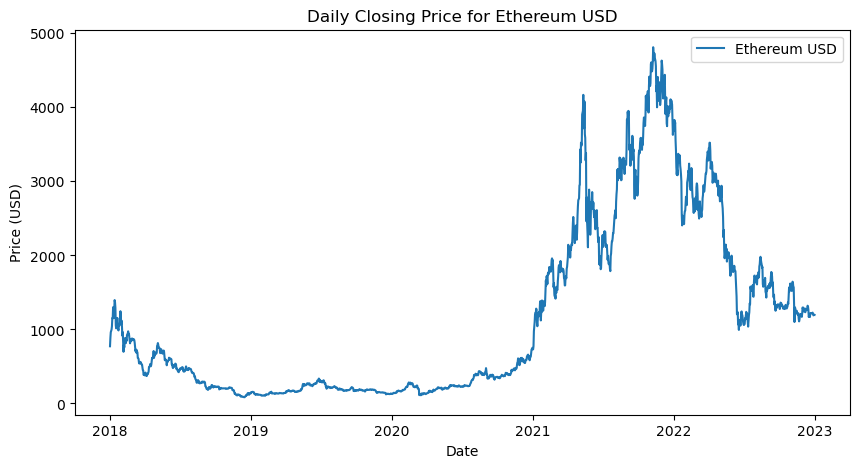

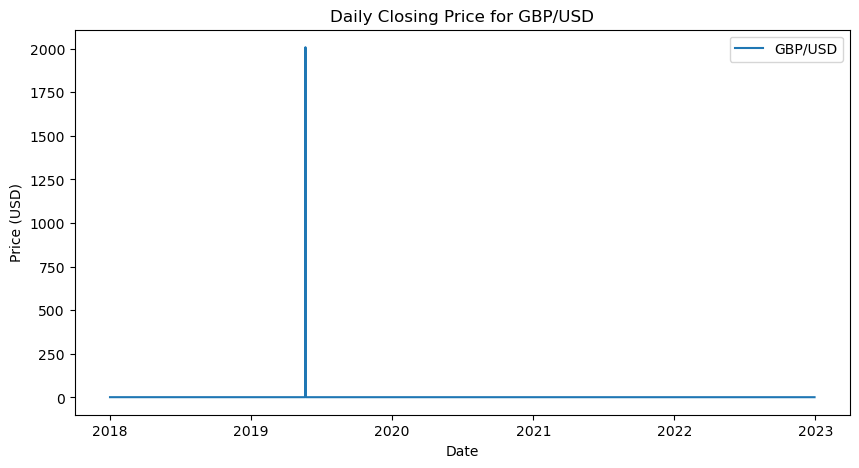

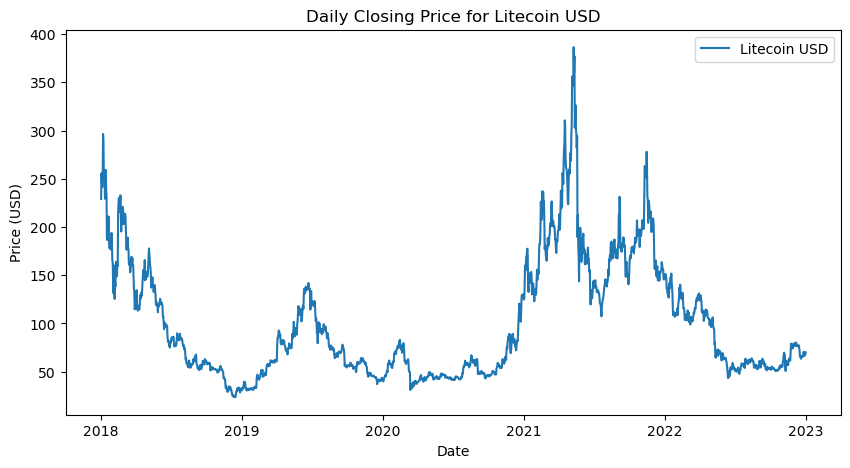

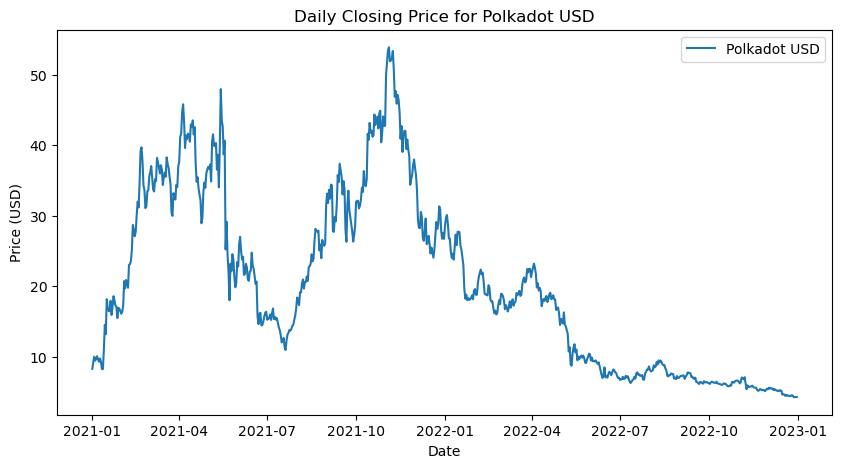

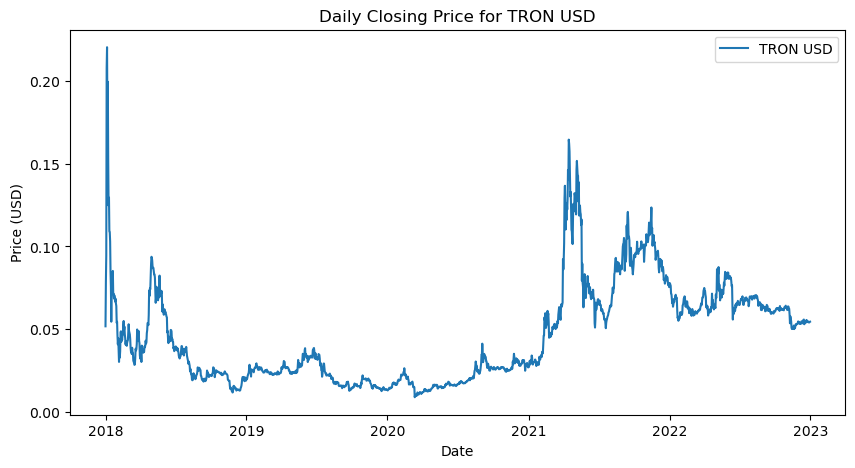

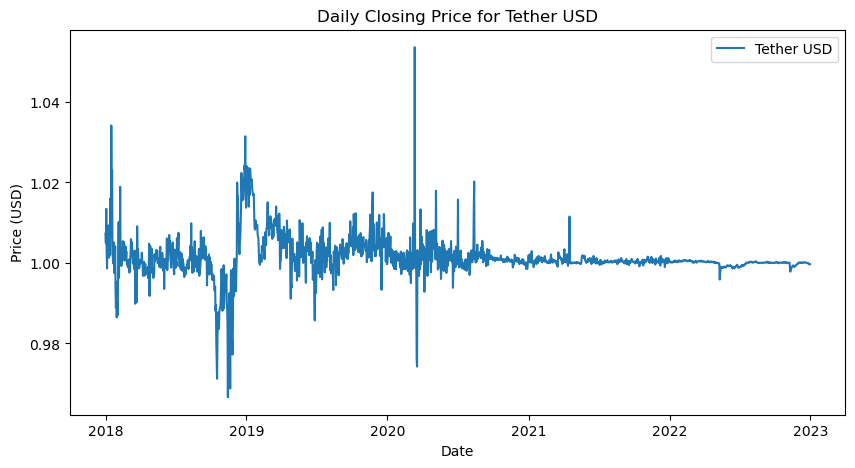

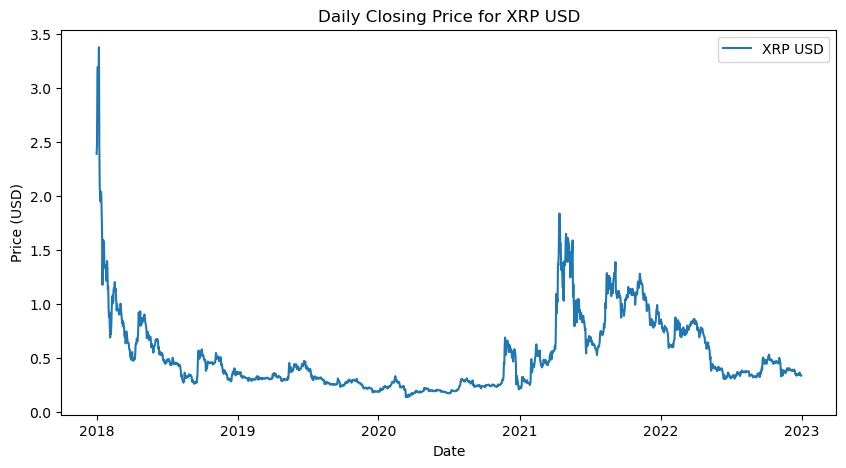

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned and normalized dataset
df = pd.read_csv('crypto-cleaned.csv')

# Convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])

# Create a new dataframe with daily closing price for each cryptocurrency
df_daily = df.groupby(['type', pd.Grouper(key='date', freq='D')])['close'].last().reset_index()

# Remove missing values
df_daily = df_daily.dropna()

# Plot daily closing price for each cryptocurrency
for currency in df_daily['type'].unique():
    plt.figure(figsize=(10, 5))
    plt.plot(df_daily.loc[df_daily['type'] == currency, 'date'], df_daily.loc[df_daily['type'] == currency, 'close'], label=currency)
    plt.title(f'Daily Closing Price for {currency}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


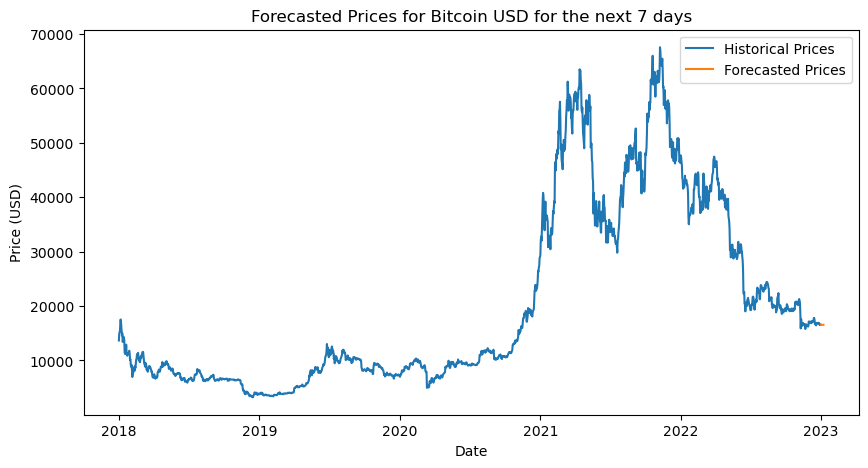

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the cleaned and normalized dataset
df = pd.read_csv('crypto-cleaned.csv')

# Convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])

# Create a new dataframe with daily closing price for each cryptocurrency
df_daily = df.groupby(['type', pd.Grouper(key='date', freq='D')])['close'].last().reset_index()

# Remove missing values
df_daily = df_daily.dropna()

# Choose the cryptocurrency to forecast
currency = 'Bitcoin USD'

# Get the daily closing prices of the chosen cryptocurrency
df_currency = df_daily.loc[df_daily['type'] == currency, ['date', 'close']].set_index('date')

# Train the ARIMA model
model = ARIMA(df_currency, order=(1, 1, 1))
model_fit = model.fit()

# Make a forecast for the next 7 days
forecast = model_fit.forecast(steps=7)

# Plot the forecasted prices along with the historical prices
plt.figure(figsize=(10, 5))
plt.plot(df_currency.index, df_currency.values, label='Historical Prices')
plt.plot(forecast.index, forecast.values, label='Forecasted Prices')
plt.title(f'Forecasted Prices for {currency} for the next 7 days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


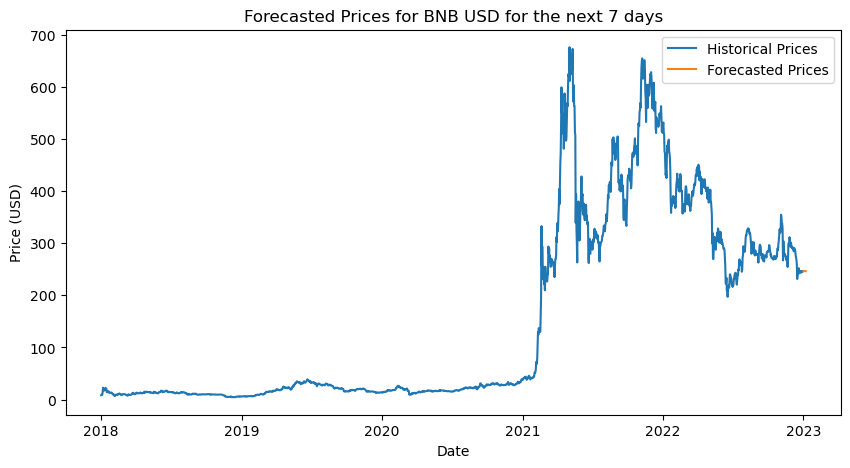

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


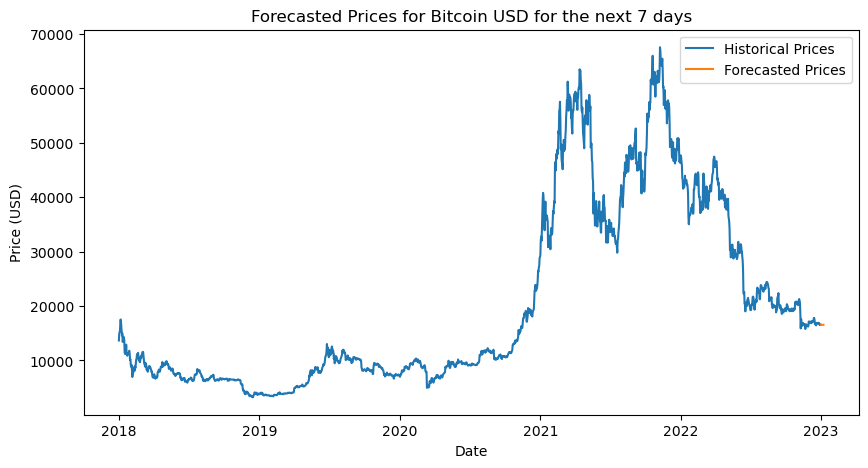

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


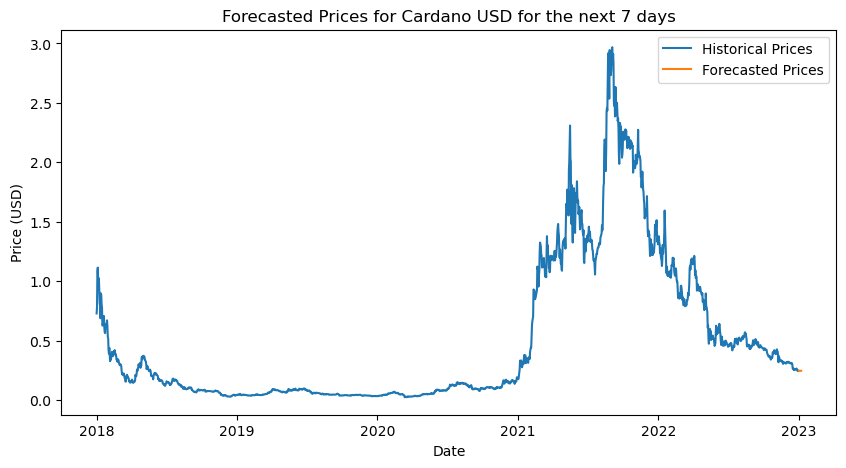

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


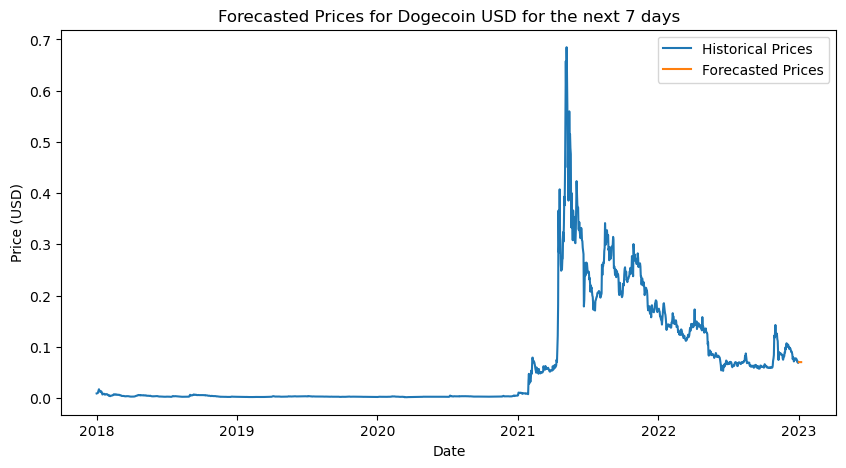

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


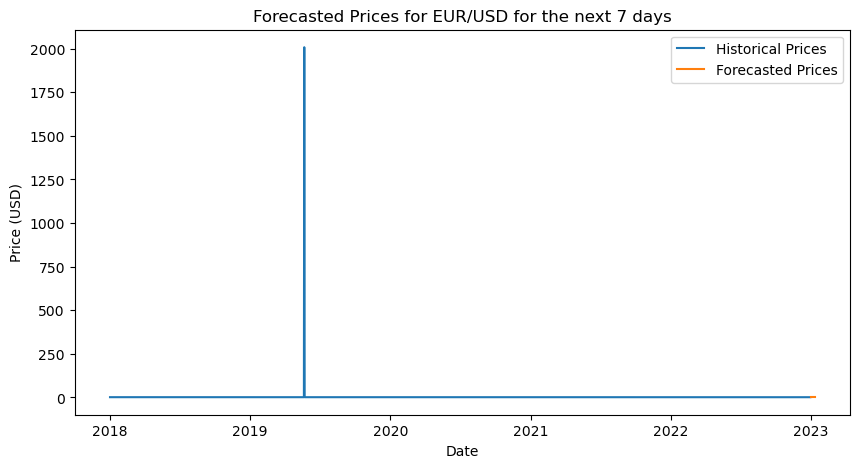

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


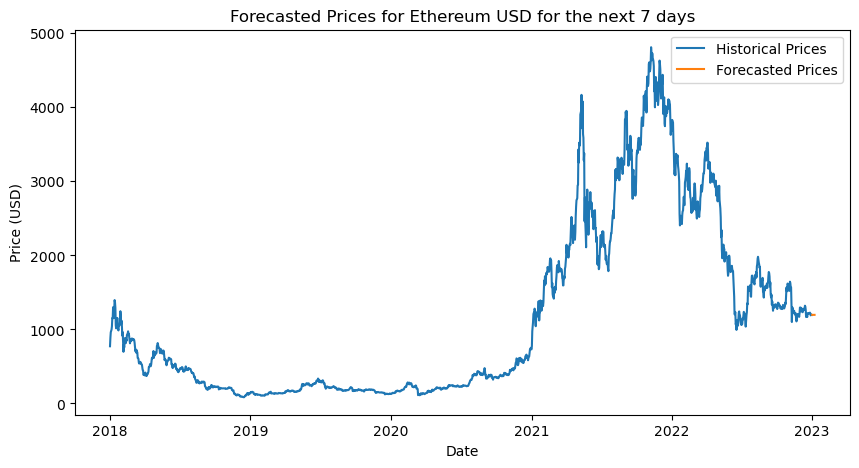

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


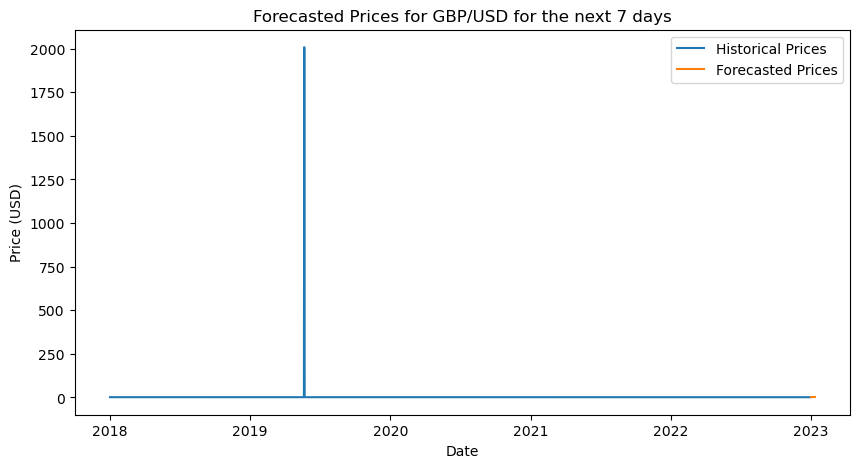

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


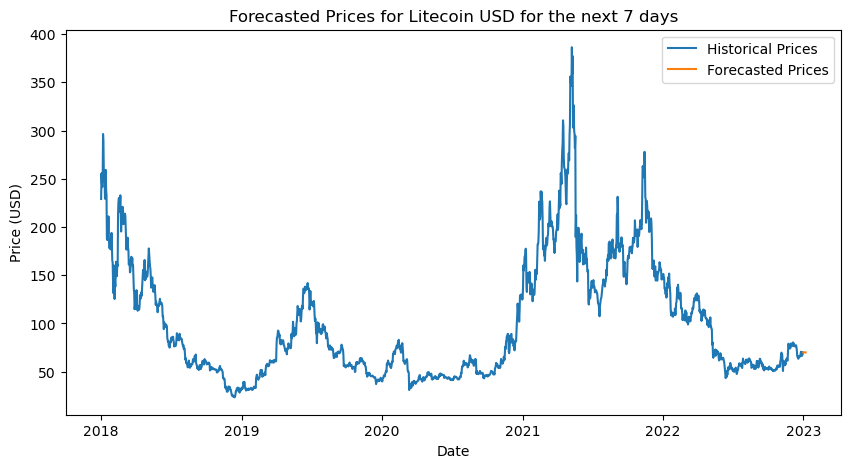

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


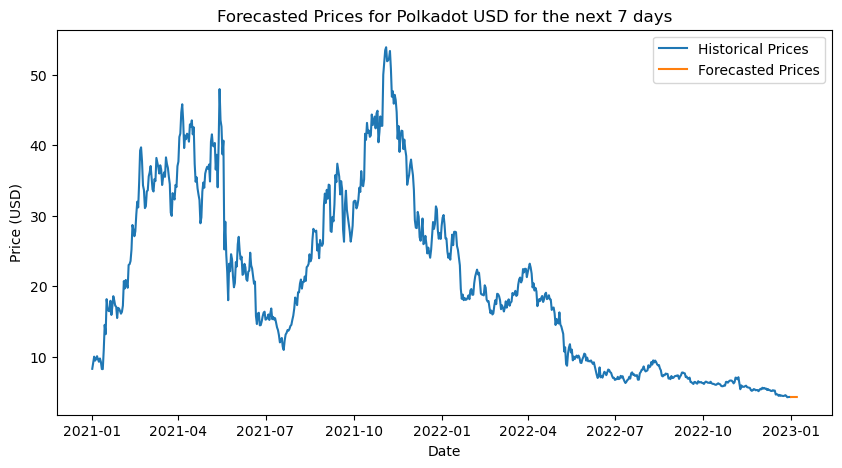

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\statespace

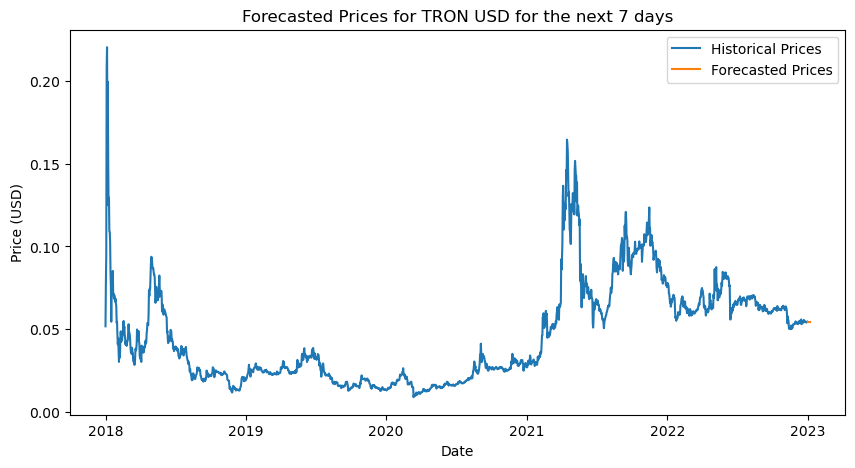

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


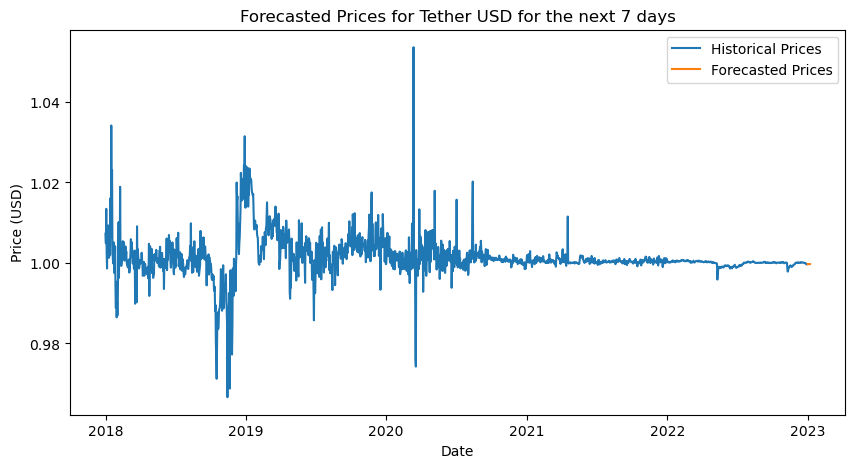

C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\anaconda3.1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


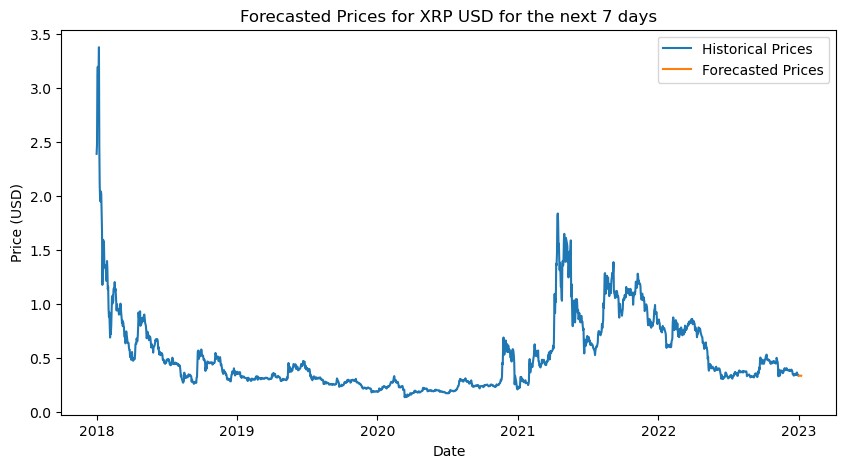